<a href="https://colab.research.google.com/github/dli-invest/investing-book/blob/feature%2Fv1.1/ibook/notebooks/diagrams/stock_arch_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
!pip install diagrams

     |████████████████████████████████| 16.1MB 278kB/s 
     |████████████████████████████████| 102kB 10.0MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=817afcdf82617fc98518949cd8d50dee836a2670e4030c658d42f3c84bfdd710
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [197]:
from diagrams import Cluster, Diagram, Edge
from diagrams.programming.language import Python, Csharp, Go
from diagrams.onprem.vcs import Github, Git
from diagrams.onprem.ci import GithubActions
from diagrams.saas.chat import Discord
from diagrams.gcp.compute import AppEngine, GCE, GCF, Run
from diagrams.gcp.devtools import Code, Build
from diagrams.elastic.elasticsearch import Elasticsearch
from diagrams.generic.storage import Storage
# blue - build/cron
# purple - notification
# green - data saving
with Diagram("stock-arch-v2", show=False):
  with Cluster ("Github Actions"):
    monthly_job_ga = GithubActions('monthly job')
    weekly_job_ga = GithubActions('weekly job')
    monthly_job_ga - weekly_job_ga
    daily_job_ga = GithubActions('daily_job')
    weekly_job_ga - daily_job_ga
    manual_job_ga = GithubActions('manual push')
    
  with Cluster("Discord"):
    dis_alerts = Discord('alerts')
    dis_investing = Discord('events')
    dis_news_halts = Discord('news + halts')
    dis_video = Discord('videos')
    # Code status not particular helpful for high level diagram
  # source = Git("source")
  with Cluster("Code Sources"):
      with Cluster("Github"):
        account = Github("account")
        dli_invest = Github("dli-invest")
        workers = [account,
                   dli_invest
                  ]
        # Personal repos related to stocks
        with Cluster('account repos'):
          stock_screener = Python('stock_screener')
          cad_tickers_list = Git('cad_tickers_list')
          cad_tickers = Python('cad_tickers')
          stocks_app = Python('stocks_app')
          news_app = Csharp('news app')
          finfiber = Go('FinFiber')
          gcf_functions = Git('Cloud Functions')
          dash_stocks = Python('Dash Stocks')
          account_repos = [stock_screener,
                            cad_tickers,
                            news_app,
                           stocks_app,
                           finfiber,
                           gcf_functions,
                           dash_stocks
                    ]
        with Cluster('dli-invest repos'):
          with Cluster('ytube nlp'):
            # grabbing youtube transcriptions
            ytube_nlp = Python('Transcripts')
            # Uses assembly AI and manually downloads videos
            ytube_nlp_ai = Python('Manual NLP')
            ytube = [ytube_nlp, ytube_nlp_ai]
          # investing book
          stock_scrapper = Python('stock-scrapper')
          news_and_halts = Python('News and Halts')
          earnings_calendar = Python('Earnings Calendar')
          # notes 
          with Cluster('Algorithmic Trading'):
              zipline_experiments = Python('Zipline')
          with Cluster('notes'):
              investing_book = Python('Investing Book')
              
          # ytube - investing_book
          # ytube - stock_scrapper

  # Cluster for Google Cloud
  with Cluster("Google Cloud Platform"):
    gcp_build = Build("Auto Build")
    sapp = Run("stocks app")
    fstocks = Run('fstocks')
    g_finfiber = AppEngine('finfiber')
    utilities = GCF('utility')
    gcp_serverless = [sapp,
                  fstocks,
                  g_finfiber
                ]
    gcp_build - gcp_serverless

  # Links to google cloud platform
  gcf_functions - Edge(label='manual deploy', color='orange') >> utilities
  finfiber - Edge (color='orange', style='dashed') >> gcp_build
  stocks_app - Edge (color='orange', style='dashed') >> gcp_build
  dash_stocks - Edge(color='orange', style='dashed') >> gcp_build
  # Other nodes
  news_db = Elasticsearch('news_db')
  fauna_db_halts_news = Storage('faunadb')

  # Dependencies on cad_Tickers
  cad_tickers - Edge(label="uses", color="purple", style='dotted') <<  [ stock_screener, cad_tickers_list]
  cad_tickers_list - Edge(label="gets stocks", color='purple', style='dotted') << [
      stock_scrapper
  ]
  # cad_tickers - Edge(label="uses", color='purple', style='dotted') << cad_tickers_list
  # Git links
  dli_invest >> ytube
  account >> account_repos
  
  # Connecting to other nodes
  news_app >> Edge(label='save data', color='green', style='dashed') >> news_db
  fauna_db_halts_news >> Edge(labe='save data', color='green', style='dashed') >> news_and_halts
  # repos calling github actions
  cad_tickers_list >> Edge(color='blue') >> monthly_job_ga
  monthly_job_ga >> Edge(label="update stocks", color='green', style="dashed") >> cad_tickers_list
  # Discord links
  # stock_screener >> Edge(color='purple') >> dis_alerts
  stock_screener >> Edge(color='blue') >> daily_job_ga
  stock_scrapper >> Edge(color='blue') >> weekly_job_ga
  news_app >> Edge(color='blue') >> daily_job_ga
  ytube_nlp >> Edge(color='blue') >> daily_job_ga
  ytube_nlp_ai >> Edge(color='blue') >> manual_job_ga
  investing_book >> Edge(color='blue') >> manual_job_ga
  earnings_calendar >> Edge(color='blue') >> weekly_job_ga
  # notifications sent out from github actions
  daily_job_ga >> Edge(color='purple') >> dis_alerts
  daily_job_ga >> Edge(color='purple') >> dis_news_halts
  manual_job_ga >> Edge(color='purple') >> dis_video
  daily_job_ga >> Edge(color='purple') >> dis_video
  # cad_tickers_list_ga >> Edge(label="notification") >> code_status

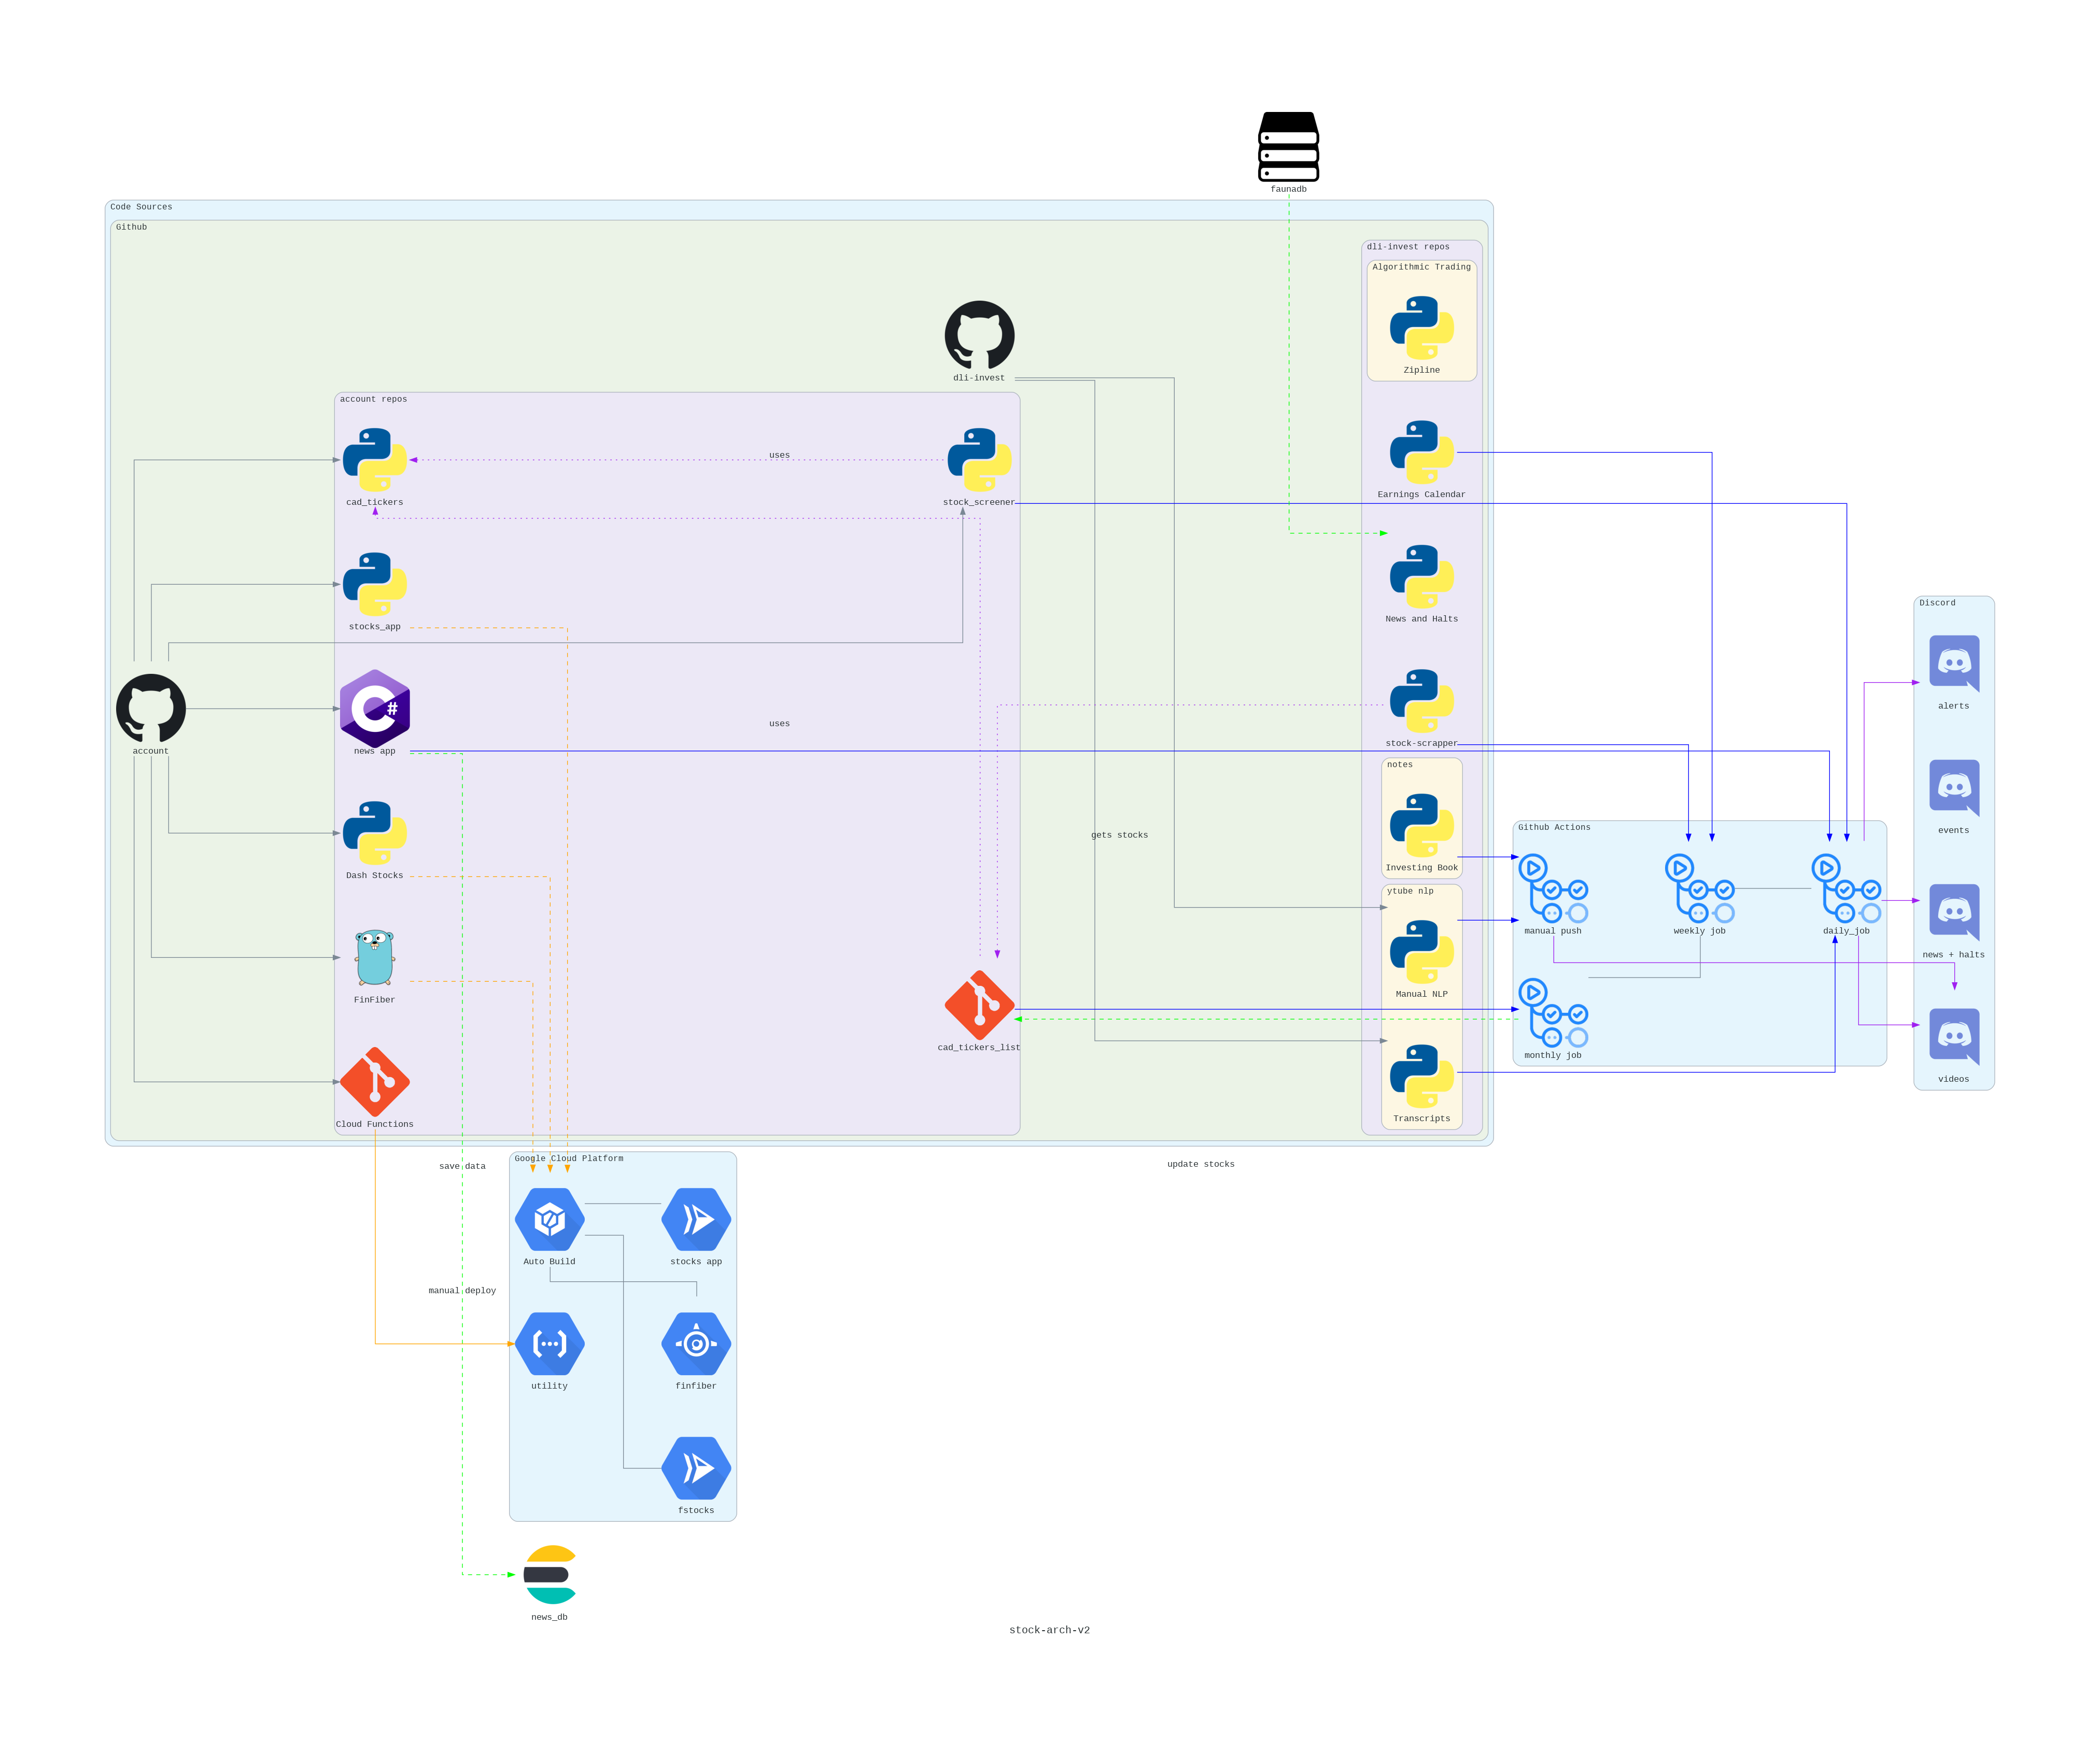

In [198]:
from IPython.display import Image
Image('stock-arch-v2.png')